In [2]:
import pandas as pd
import numpy as np

# Function to categorize occupations
def categorize_occupation(occupation):
    if occupation in [1, 2, 17, 18]:
        return 'Management'
    elif occupation in [3, 19, 20, 21, 22]:
        return 'Professionals'
    elif occupation in [4, 23, 24, 25, 26]:
        return 'Technicians'
    elif occupation in [5, 27, 28, 29]:
        return 'Administrative'
    elif occupation in [6, 30, 31, 32, 33]:
        return 'Service and Sales'
    elif occupation in [7, 34, 35]:
        return 'Agriculture and Fishery'
    elif occupation in [8, 36, 37, 38, 39]:
        return 'Craft and Related Trades'
    elif occupation in [9, 40, 41, 42]:
        return 'Plant and Machine Operators'
    elif occupation in [10, 43, 44, 45, 46]:
        return 'Elementary Occupations'
    elif occupation in [11, 14, 15, 16]:
        return 'Armed Forces'
    else:
        return 'Other'

# Function to categorize parent qualifications
def categorize_qualification(qualification):
    if qualification in [1, 10, 11, 12, 13, 14, 15, 16]:
        return 'Complete Secondary Education'
    elif qualification in [7, 8, 17, 19, 20]:
        return 'Incomplete Secondary Education'
    elif qualification in [2, 3, 4, 5, 6, 30, 31, 32]:
        return 'Higher Education - Undergraduate'
    elif qualification in [33, 34]:
        return 'Higher Education - Postgraduate'
    elif qualification in [27, 28]:
        return 'Basic Education (1st and 2nd Cycle)'
    elif qualification in [9, 18, 21]:
        return 'Basic Education (3rd Cycle)'
    elif qualification == 29:
        return 'Technological Specialization'
    elif qualification in [25, 26]:
        return 'No Formal Education'
    elif qualification == 24:
        return 'Unknown'
    else:
        return 'Other Specific Qualifications'

# Function to categorize previous qualification
def categorize_previous_qualification(qualification):
    if qualification == 1:
        return 'Complete Secondary Education'
    elif qualification in [7, 8, 9, 10, 11]:
        return 'Incomplete Secondary Education'
    elif qualification in [2, 3, 15]:
        return 'Higher Education - Bachelor/Degree'
    elif qualification in [4, 17]:
        return 'Higher Education - Master'
    elif qualification == 5:
        return 'Higher Education - Doctorate'
    elif qualification == 6:
        return 'Frequency of Higher Education'
    elif qualification == 12:
        return 'Basic Education (3rd Cycle)'
    elif qualification == 13:
        return 'Basic Education (2nd Cycle)'
    elif qualification == 14:
        return 'Technological Specialization'
    elif qualification == 16:
        return 'Professional Higher Technical'
    else:
        return 'Other'

# Load the data
df = pd.read_csv('data.csv')

df['Adult'] = (df['Age at enrollment'] >= 21).astype(int)

# 1. Replace occupation and qualification categories
df['Father\'s occupation'] = df['Father\'s occupation'].apply(categorize_occupation)
df['Mother\'s occupation'] = df['Mother\'s occupation'].apply(categorize_occupation)
df['Father\'s qualification'] = df['Father\'s qualification'].apply(categorize_qualification)
df['Mother\'s qualification'] = df['Mother\'s qualification'].apply(categorize_qualification)
df['Previous qualification'] = df['Previous qualification'].apply(categorize_previous_qualification)

# 2. Omit records not in top 5 common qualifications for parents
top_5_father_qual = df['Father\'s qualification'].value_counts().nlargest(5).index
top_5_mother_qual = df['Mother\'s qualification'].value_counts().nlargest(5).index

df = df[df['Father\'s qualification'].isin(top_5_father_qual) & 
        df['Mother\'s qualification'].isin(top_5_mother_qual)]

# consider only records with nationality as Portuguese
df = df[df['Nacionality'] == 1]


# 3. Omit records not in top 4 common previous qualifications
top_4_prev_qual = df['Previous qualification'].value_counts().nlargest(4).index
df = df[df['Previous qualification'].isin(top_4_prev_qual)]

# Save to a new CSV file
df.to_csv('preprocessed_data.csv', index=False)

print("Preprocessing complete. Data saved to 'preprocessed_data.csv'")
print(f"Original data shape: {pd.read_csv('partial data.csv').shape}")
print(f"Preprocessed data shape: {df.shape}")

Preprocessing complete. Data saved to 'preprocessed_data.csv'
Original data shape: (4, 37)
Preprocessed data shape: (4249, 38)


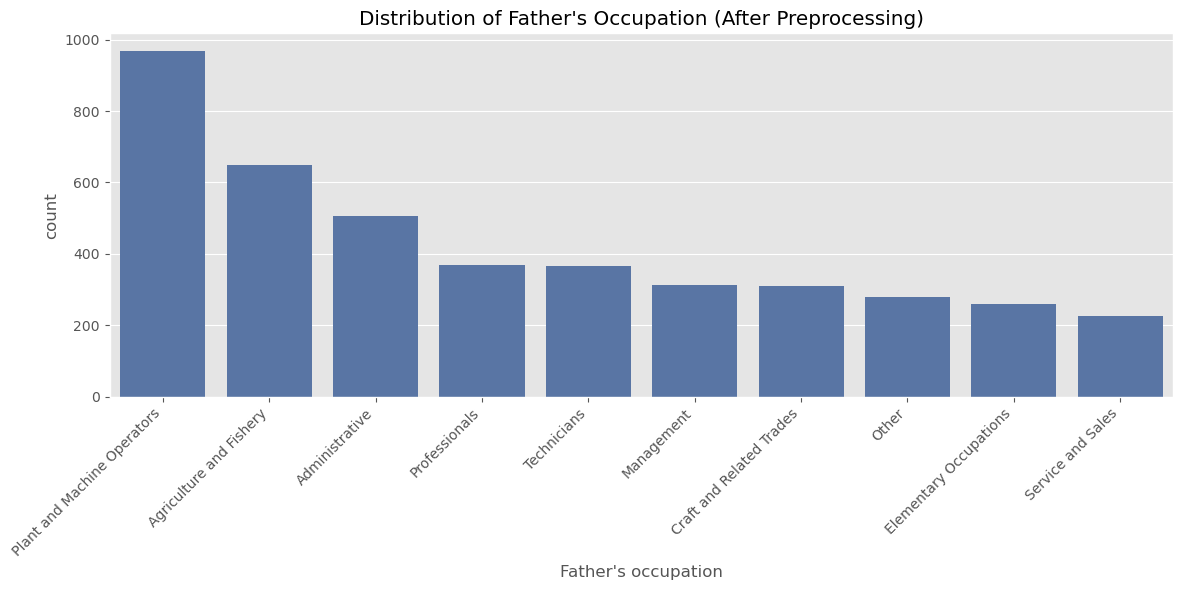

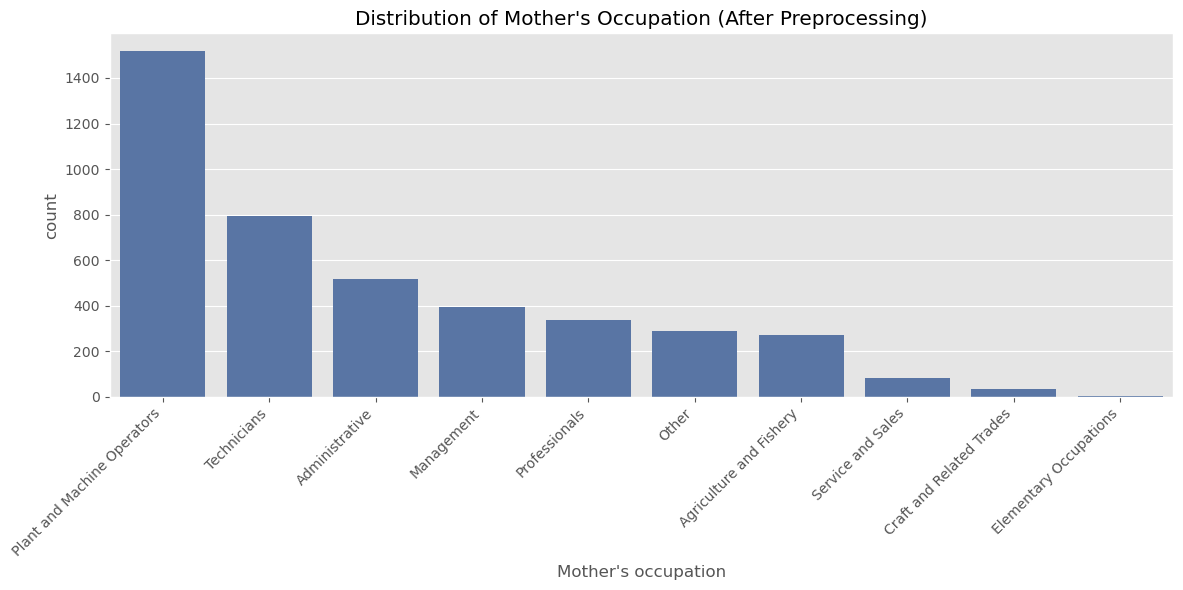

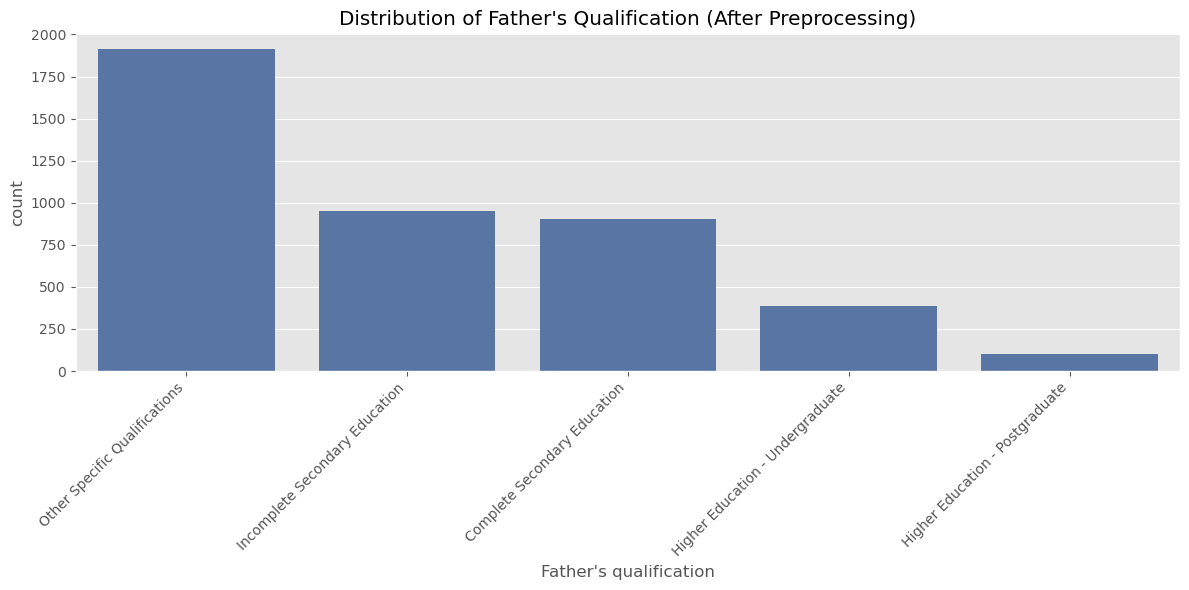

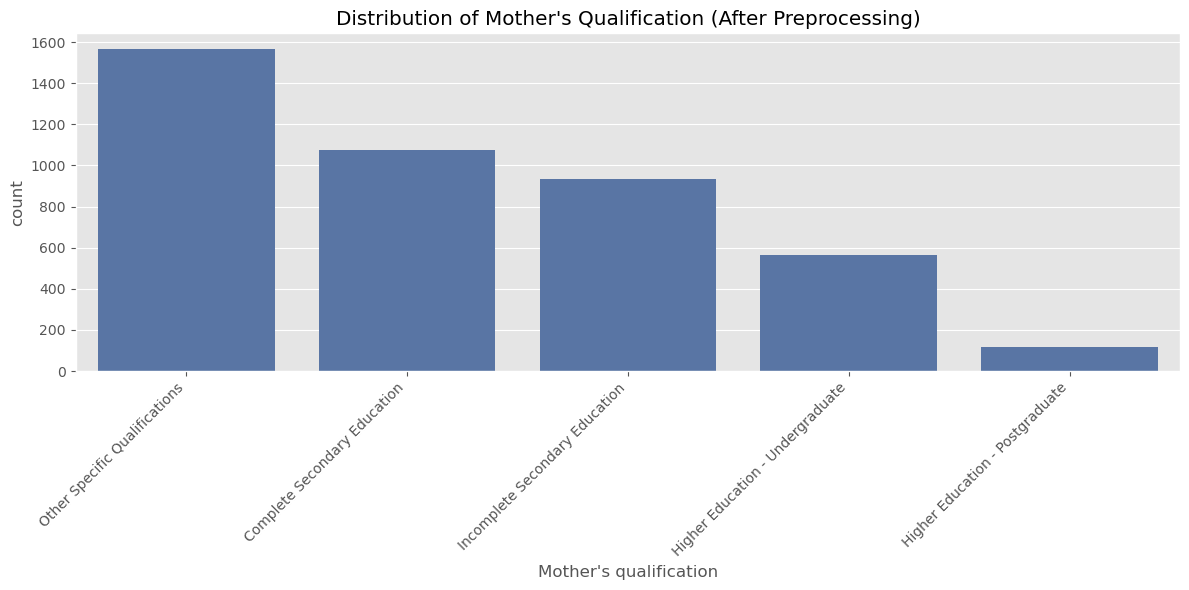

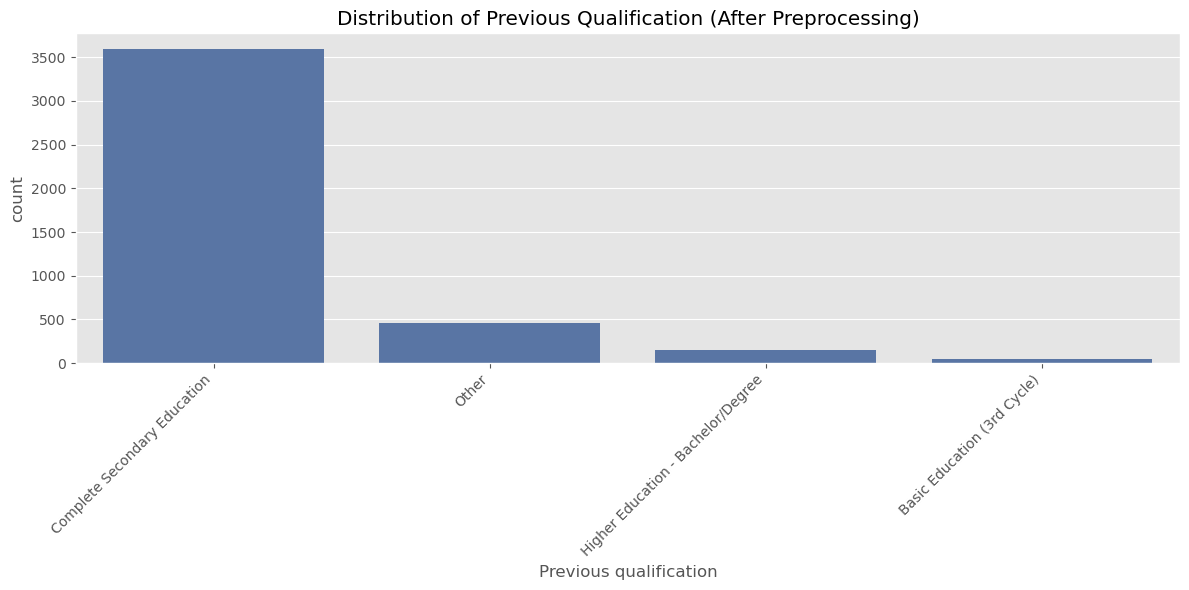

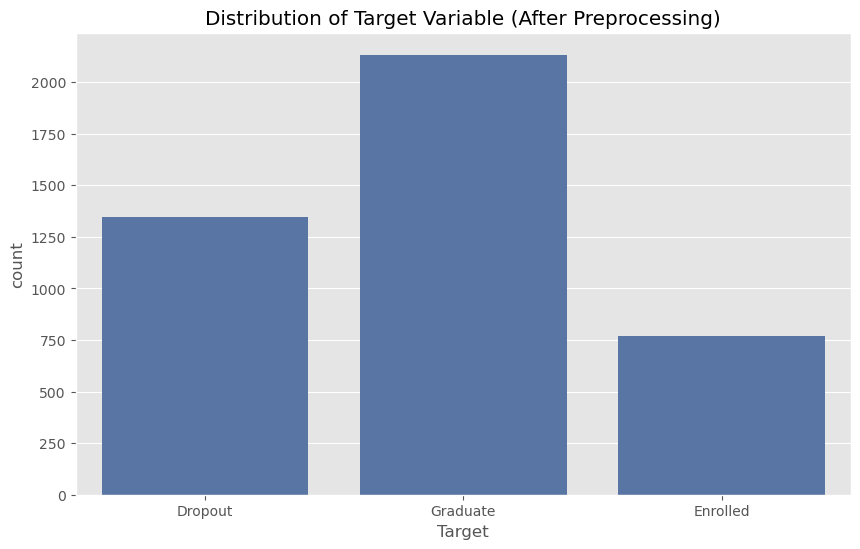

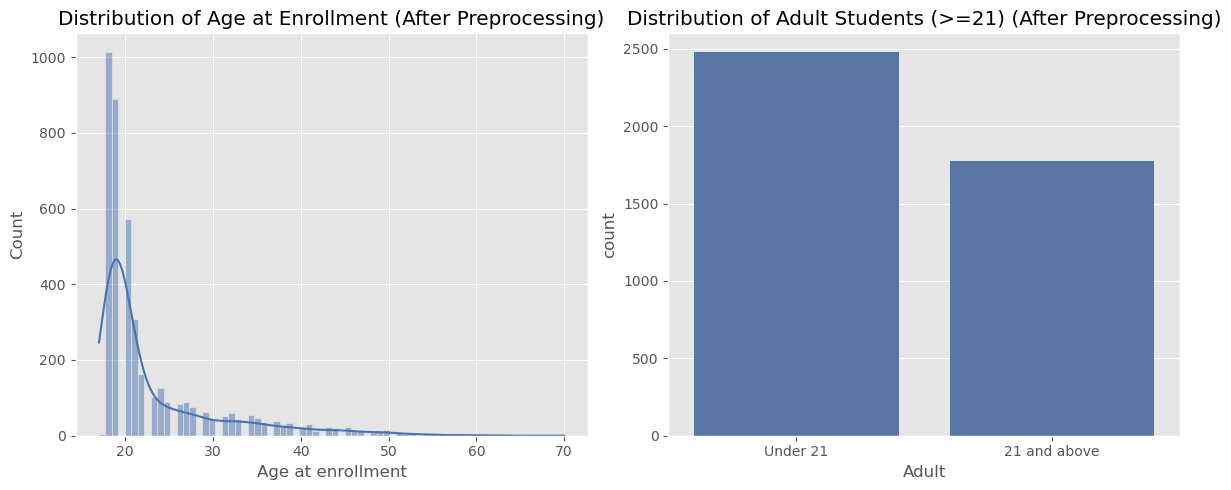

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
plt.style.use('ggplot')
sns.set_palette("deep")

# Function to plot category distributions
def plot_category_distribution(data, column, title):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

df_filtered = pd.read_csv('preprocessed_data.csv')
# Plot distributions
plot_category_distribution(df_filtered, 'Father\'s occupation', 'Distribution of Father\'s Occupation (After Preprocessing)')
plot_category_distribution(df_filtered, 'Mother\'s occupation', 'Distribution of Mother\'s Occupation (After Preprocessing)')
plot_category_distribution(df_filtered, 'Father\'s qualification', 'Distribution of Father\'s Qualification (After Preprocessing)')
plot_category_distribution(df_filtered, 'Mother\'s qualification', 'Distribution of Mother\'s Qualification (After Preprocessing)')
plot_category_distribution(df_filtered, 'Previous qualification', 'Distribution of Previous Qualification (After Preprocessing)')

# Additional visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df_filtered)
plt.title('Distribution of Target Variable (After Preprocessing)')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['Age at enrollment'], kde=True)
plt.title('Distribution of Age at Enrollment (After Preprocessing)')
plt.subplot(1, 2, 2)
sns.countplot(x='Adult', data=df_filtered)
plt.title('Distribution of Adult Students (>=21) (After Preprocessing)')
plt.xticks([0, 1], ['Under 21', '21 and above'])
plt.tight_layout()
plt.show()